In [1]:
f"Мій варіант #{ord('K') % 3 + 1}"

'Мій варіант 1'

In [2]:
#1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр і повертає масив numpy зі значеннями стовпця.

import csv
import numpy as np
import matplotlib.pyplot as plt

def get_row_from_file(filename, target_row):
    with open(filename, newline="") as file:
        reader = csv.reader(file, delimiter=",", quotechar="|")
        values = []  
        row_number = -1
        for i, row in enumerate(reader):
            if i == 0:
                for i, row_name in enumerate(row):
                    if target_row == row_name:
                        row_number = i 
                        break
            else:
                if row_number != -1:
                    values.append(row[row_number])  

        return np.array(values)  


In [15]:
#2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «літак».

get_row_from_file("russia_losses_equipment.csv", "aircraft")

array(['369', '369', '369', '369', '369', '369', '369', '369', '369',
       '369', '369', '369', '369', '369', '369', '369', '369', '369',
       '368', '368', '368', '368', '368', '368', '368', '368', '368',
       '368', '368', '368', '368', '368', '368', '367', '367', '367',
       '367', '367', '367', '367', '367', '367', '367', '367', '367',
       '367', '366', '366', '366', '366', '366', '366', '366', '365',
       '365', '365', '363', '363', '363', '363', '363', '363', '363',
       '363', '363', '363', '363', '363', '362', '362', '362', '362',
       '361', '361', '361', '361', '361', '361', '361', '361', '361',
       '361', '361', '361', '360', '360', '360', '360', '360', '360',
       '360', '360', '360', '360', '359', '359', '359', '359', '359',
       '359', '359', '359', '359', '359', '359', '359', '359', '359',
       '359', '359', '359', '358', '357', '357', '357', '357', '357',
       '357', '357', '357', '357', '357', '357', '357', '357', '357',
       '357', '356',

In [4]:
#3. Знайдіть добові втрати літаків.

aircraft_losses = get_row_from_file("russia_losses_equipment.csv", "aircraft").astype(int)
aircraft_losses_per_day = aircraft_losses

for i, value in enumerate(aircraft_losses_per_day[1:]):
    aircraft_losses_per_day[i] = aircraft_losses_per_day[i] - aircraft_losses[i + 1]
    
aircraft_losses_per_day

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  2,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  3,  0,  2,  0,  0,  0,  1,  0,  1,
        0,  2,  1,  3,  0

In [5]:
#4. Знайдіть 3 найбільші добові втрати літаків.

aircraft_losses_per_day[aircraft_losses_per_day.argsort()][-3:]

array([10, 16, 17])

In [9]:
#5. Визначте, скільки літаків було збито влітку 2022 року.

summer_begin = np.datetime64('2022-06-01')
summer_end = np.datetime64('2022-08-31')

dates = get_row_from_file("russia_losses_equipment.csv", "date").astype('datetime64[s]')

aircraft_per_summer = 0
for i, date in enumerate(dates):
    if summer_begin <= date <= summer_end:
        aircraft_per_summer += aircraft_losses_per_day[i]
        
f"Total aircraft losses per summer 2022 are {aircraft_per_summer}"

'Total aircraft losses per summer 2022 are 26'

In [10]:
#6. Знайдіть середнє значення втрат авіації за останні 300 днів війни.

counter = 0
for i, destroyed in enumerate(aircraft_losses_per_day):
    counter += destroyed
    if i == 300:
        print(f"Average aircrafts losses for last 300 days are {counter / 3}")
        break

Average aircrafts losses for last 300 days are 15.333333333333334


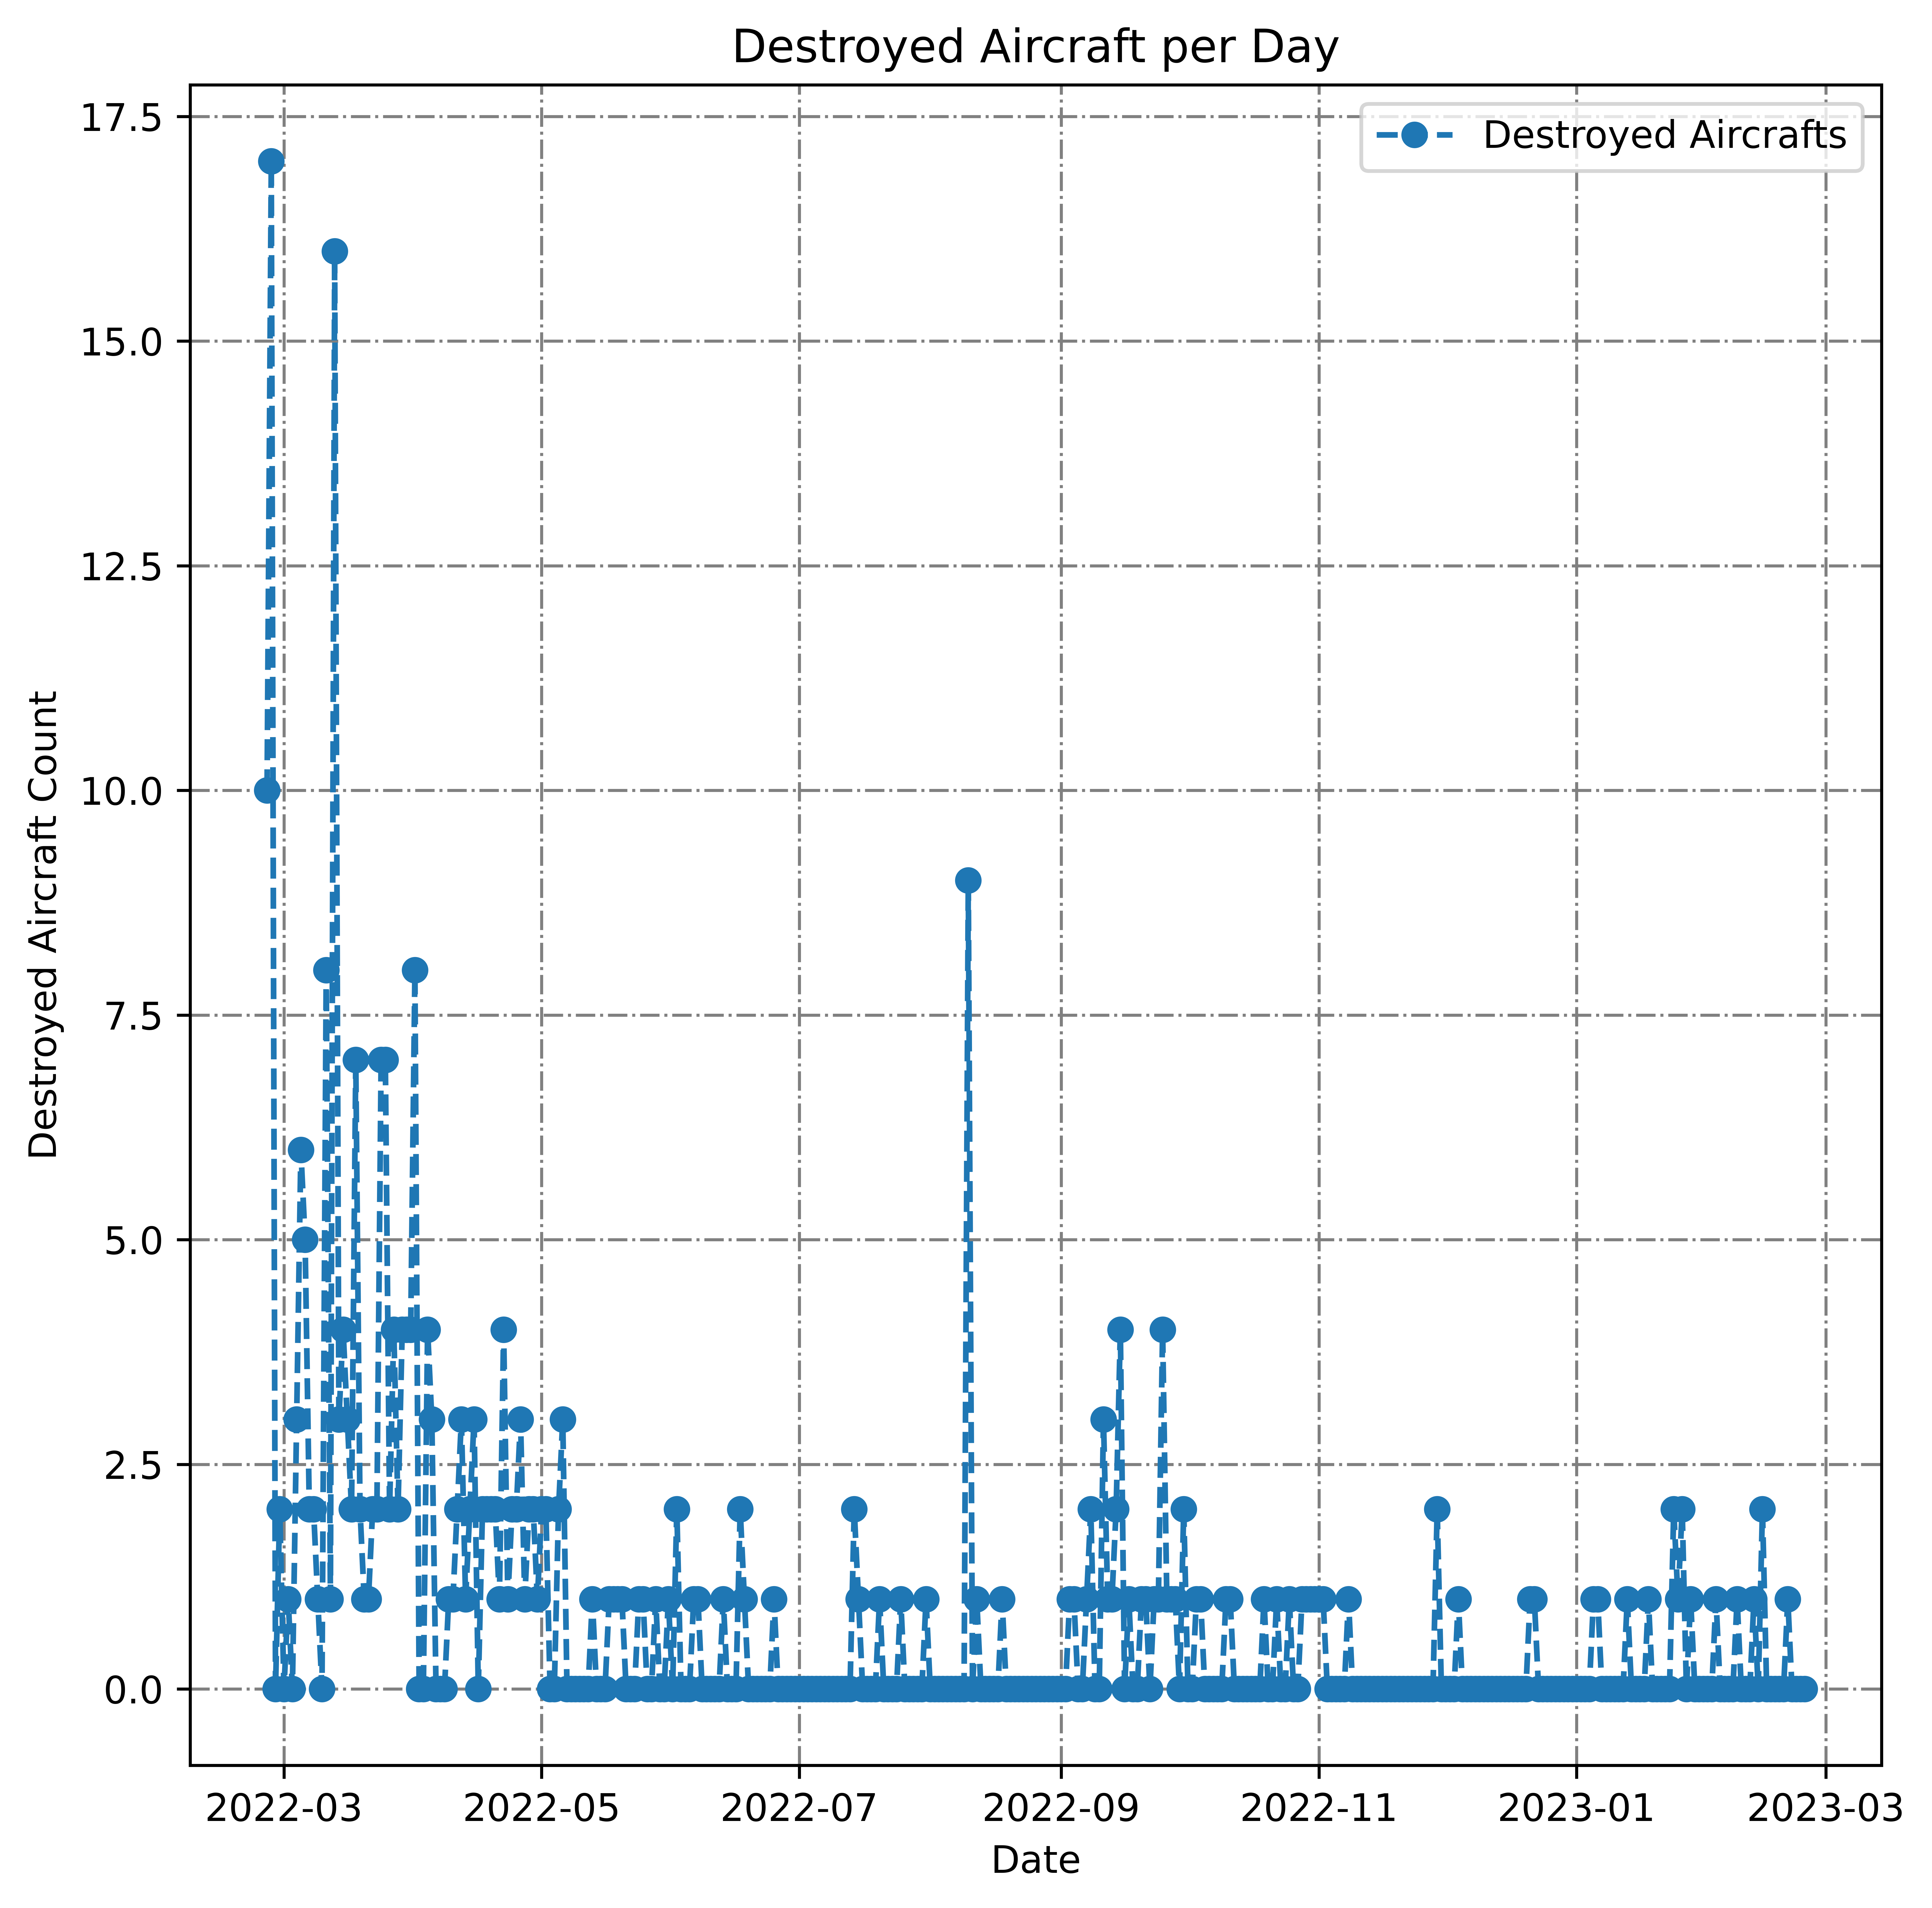

In [13]:
#7. Створіть графік втрат літаків за перший рік війни (починаючи з першої дати в наборі даних)

dates = get_row_from_file("russia_losses_equipment.csv", "date").astype('datetime64[s]')
destroyed = []
dates_list = []

for i, loss_per_day in enumerate(reversed(aircraft_losses_per_day)):
    if i == 365:
        break
    destroyed.append(loss_per_day)
    dates_list.append(dates[(dates.size - 1) - i])

xp = np.array(dates_list)  # x-axis: dates
yp = np.array(destroyed)  # y-axis: destroyed counts

fig = plt.figure(figsize=(8, 8), dpi=1000)
ax = fig.add_subplot(111)  
ax.plot(xp, yp, linestyle="--", marker="o", label="Destroyed Aircrafts")
ax.set_xlabel("Date")
ax.set_ylabel("Destroyed Aircraft Count")
ax.set_title("Destroyed Aircraft per Day")
ax.grid(True, color="gray", linestyle="-.")
ax.legend()
plt.show()